<h1 align='center'> The Singular Value Decomposition </h1>
<h2 align='center'> As a tool for analyzing Matrices </h2>

$  % These are latex commands (i.e., macros). 
   \newcommand{\vec}[1]{ \boldsymbol{\mathbf{#1}} }
   \newcommand{\R}{\mathbb{R}}
   \newcommand{\C}{\mathbb{C}}
   \newcommand{\tr}[1]{\mathrm{tr}\left( #1 \right)}
   \newcommand{\ran}{\mathrm{ran}}
   \newcommand{\MC}[1]{\mathcal{M}_{#1}\left(\mathbb{C}\right)}
   \newcommand{\MR}[1]{\mathcal{M}_{#1}\left(\mathbb{R}\right)}
$

Here we explore the use of the SVD in Image Processing.  However, we should think of this as an extension of the concept of matrices as "vector objects" in a vector space. 

In [1]:
%matplotlib inline 

from matplotlib import pyplot as plt
import numpy as np
from scipy import linalg

<p>&nbsp;</p>

## Matrices as Vector Spaces 

The set of all $m \times n$ real matrices $\MR{m,n}$ is itself a vector space, since the linear combination of two $m \times n$ matrices is itself an $m \times n$ matrix.  Typically, we think of $\MR{m,n}$ as the matrices of linear transformations from $\R^n$ to $\R^m$, which it certainly is. 

However, $\MR{m,n}$ is much more than simply models of linear transformations.  Indeed, nearly every vector space we have encountered to this point can in fact be modeled by either $\MR{m,n}$ or one of its subspaces, including the following: 

__1.__ The column spaces $\R^m$ are modeled by $\MR{m,1}$.

__2.__ The row spaces $\R_n$ are modeled by $\MR{1,n}$.  

__3. VERY IMPORTANT:__ A data set comprised of $m$ observations of $n$ random variables (called _features_ or _factors_) is of the form <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">$X_1$</th>
    <th class="tg-yw4l">$X_2$</th>
    <th class="tg-yw4l">...</th>
    <th class="tg-yw4l">$X_n$</th>
  </tr>
  <tr>
    <td class="tg-yw4l">obs 1</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">...</td>
    <td class="tg-yw4l">#</td>
  </tr>
  <tr>
    <td class="tg-yw4l">obs 2</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">...</td>
    <td class="tg-yw4l">#</td>
  </tr>
  <tr>
    <td class="tg-yw4l">$\vdots$</td>
    <td class="tg-yw4l">$\vdots$</td>
    <td class="tg-yw4l">$\vdots$</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l">$\vdots$</td>
  </tr>
  <tr>
    <td class="tg-yw4l">obs $m$</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">#</td>
    <td class="tg-yw4l">...</td>
    <td class="tg-yw4l">#</td>
  </tr>
</table> 
<br/>&nbsp;&nbsp;&nbsp;&nbsp; and is often denoted by $X = \left[ X_1, X_2, ..., X_n \right]$. 

As an application context, we tend to think of $\MR{m,n}$ in terms of $ m \ne n$, as in fact is the case in items 1,2,3  in the list above.  This is important, because unlike matrices as models of linear transformations, we do not expect to be able to multiply two vectors to obtain another vector.  

<div align='center' style="color:blue;font-size:larger"><br/> If $m \ne n$, then the product of two $m \times n$ matrices is <b>not</b> defined</div>


For example, we do __not__ expect to be able to "matrix" multiply two data sets to get a third data set.    


Consequently, $\MR{m,n}$ should be thought of as a vector space for which multiplication -- when used -- is for _analyzing_ or _decomposing_ a vector in $\MR{m,n}$.  Indeed, much of the remainder of this course is based on the following principle: 

<div align = 'center' style = 'color:blue;font-size:larger'><br/><b>In many applications, the vector spaces are modeled by $\MR{m,n}$</b></div>   


Indeed, consider how "universal" the vector space $\MR{m,n}$ truly is: 

__4.__ Complex Vector spaces $\C^m$ can be modeled by $\MR{m,2}$, where the first column contains the real parts and the second column contains the imaginary part of  complex vectors.  

__5.__ Complex Matrix Spaces $\MC{m,n}$ can likewise be modeled by $\MR{m,2n}$.  

__6.__ Unstructured data, in which information is conveyed as key-value pairs, is often represented by often _huge_ sparse ( = mostly zeros) matrices in a number of different ways, including as data sets $X$ in which keys are variables and values are observations -- with a 1 if a given value is observed for a given key and zeros elsewhere. 

Even images -- which should not be thought of as "rows" of "columns" or as linear transformations in general -- can be modeled by matrices in $\MR{m,n}$.  That is because matrices in $\MR{m,n}$ can be written in _block_ format or other formats where a large matrix can be thought of as a collection of smaller matrices.  


__7.__ Grayscale images, which are 2 dimensional arrays in the spaces $\R^{m\times n}$ can also be modeled by matrices in $\MR{m,n}$. 

Of course, an image is not a list of columns or a collection of rows, but the _point_ is that a matrix in $\MR{m,n}$ is itself _not_ necessarily interpreted as such -- e.g., interpretations 1, 2, and 3 are certainly valid, but they are not exclusive.  

Indeed, let's load a grayscale image and explore how an $m \times n$ matrix model can be used to explore it. 

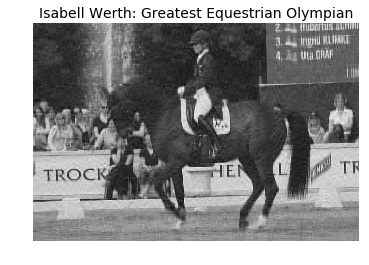

In [2]:
# be sure the image 'IsabellWerth.jpg' is in the same folder as this notebook
# You can create a new cell and execute %ls to list files in your current folder
    
IsabellWerth = plt.imread('IsabellWerthGray.png') 

plt.imshow(IsabellWerth )
plt.title("Isabell Werth: Greatest Equestrian Olympian", 
           fontsize = 14)
plt.axis('off');

In [3]:
IsabellWerth.shape  # Currently is an RGB image

(427, 640, 4)

In [4]:
from skimage import color

#Converting to a matrix representation

A = color.rgb2gray(IsabellWerth)
A.shape

(427, 640)

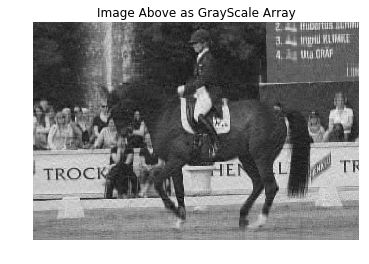

In [5]:
plt.gray()
plt.imshow(A)
plt.axis('off')
plt.title("Image Above as GrayScale Array");

In [ ]:
A  ## Is a 640 pixel wide ( 640 columns) 
   ## by 427 pixels high (427 rows) array

Although matrix multiplication is __not__ defined between two $m \times n $ matrices with $m \ne n$, we can multiply an $m \times n$ matrix $A$ by the _transpose_ of the $m \times n$ matrix $B$.  In particular, notice that in array form that
$$ A B^T = \left[ \;\;  \sum_{j=1}^n a_{i,j} b_{k,j} \;\;   \right]_ {i,k = 1}^{m,m}$$
The _trace_ of $B^T A$ is correspondingly the sum of the diagonal entries, which in array form is the sum over the entries where $i = k$. Consequently, 
$$ \tr{A B^T} = \sum_{i=1}^m \sum_{j=1}^n a_{i,j} b_{i,j} $$ 
Moreover, we get the exact same result -- sum over products of respective coefficients -- for the trace of $B^T A$: 
$$ B^T A = \left[ \;\;  \sum_{i=1}^m b_{i,k}a_{i,j}  \;\;   \right]_ {j,k = 1}^{n,n}  \quad \implies \quad 
\tr{B^T A} = \sum_{j=1}^n \sum_{i=1}^m  b_{i,j} a_{i,j} $$
Indeed, $\tr{B^T A}$ generalizes the inner product on column spaces $\R^n$ to the vector space of matrices $\MR{m,n}$.  That is, 
$$\left\langle A, B \right\rangle  = \tr{B^T A}$$ 
is an inner product on $\MR{m,n}$.

> __Definition:__ The _Frobenius inner product_ on $\MR{m,n}$ is $$\left\langle A, B \right\rangle  = \tr{B^T A}$$

The inner product of a matrix with itself is thus the square of a norm that we call the _Frobenius norm_ of a matrix in $\MR{m,n}$. 

> __Definition:__ The _Frobenius norm_ for any $A \in \MR{m,n}$ satisfies $$ \left\Vert A \right\Vert_\mathcal{F}^2 = \tr{A^T A}$$  

For example, let's look at the Fredholm norm of our grayscale image. 

In [6]:
linalg.norm(A, ord= 'fro')

247.15053487520686

In [7]:
linalg.norm(A, ord= 'fro')**2

61083.38688910084

In [8]:
sum( np.diag( A.T @ A ) ) #Which is the sum of the singular values squared

61083.38688910042

There are some quite interesting applications of the trace inner product ( = Frobenius inner product), but we will restrict our our focus on the Frobenius norm as it is quite useful in image processing when used in association with the Singular Value Decomposition. 

<p>&nbsp;</p> 

## The Singular Value Decomposition

If $A \in \MR{m,n}$, then there exists _orthogonal_ matrices $U \in \MR{m}$ and $V \in \MR{n}$ such that 
$$ A = U \; \Sigma \; V^T \quad \mathrm{where} \quad A^TA = V \; \Sigma^2 \; V^T$$ 
where $\Sigma $ is a non-negative diagonal matrix with the same shape as $A$ and $\Sigma^2$ is the same shape as $A^*A$.  

In fact, $\Sigma$ is always assumed to be  
$$\Sigma = \begin{bmatrix} \tilde{\Sigma}  & 0 \\ 0 & 0 \end{bmatrix} \quad where \quad 
           \tilde{\Sigma} = \begin{bmatrix} s_1 & ...    &      0   \\
                                         \vdots & \ddots &   \vdots \\ 
                            0 &  ...   & s_r   \end{bmatrix} $$
with the understanding that the shape of $\Sigma$ or any function of $\Sigma$ is filled with zeros sufficient to make it the right "shape" for the application.  For example, 
$$ A^T = V \Sigma U^T $$
where the shape of $\Sigma$ is now $n \times m$.  

The positive numbers $s_1 \ge s_2 \ge ... \ge s_r > 0$
are the non-zero _singular values_ of $A$.  

Let's return to our example image and explore its singular value decomposition. In particular, only the diagonal entries of $\Sigma$ are returned, with the understanding that __linalg.diagsvd__ can be used to provide the proper shape for $\Sigma$ when necessary.  

In [9]:
U, Σ, Vᵀ = linalg.svd(A)
Σ[:50]  #The first 50 singular values 

array([231.02462108,  47.00373135,  34.67441048,  28.96320723,
        21.77682766,  19.46169879,  17.75670948,  16.61925944,
        14.07284782,  13.07995859,  11.00785127,  10.83212907,
         9.89924718,   9.59231885,   9.28870329,   8.74588753,
         8.36582334,   8.20933628,   8.08839629,   7.62448075,
         7.36044041,   7.19575122,   7.14124707,   6.8269769 ,
         6.38595025,   6.08351908,   6.03322307,   5.7839006 ,
         5.68534592,   5.40687055,   5.23821771,   5.15541341,
         4.94206309,   4.92218679,   4.79562339,   4.73847953,
         4.53971755,   4.44968416,   4.40977778,   4.29517748,
         4.23076629,   4.15381761,   4.10030758,   4.07087092,
         4.02128093,   3.84491925,   3.82144802,   3.78278373,
         3.62528773,   3.6081747 ])

There in fact 427 singular values in all, but notice how even the top 50 decay quickly from more than 231 to single digits.  Indeed, let's plot the singular values instead of actually looking at their numerical values.  

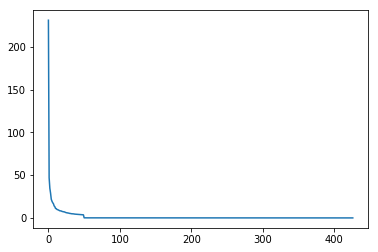

In [10]:
#plt.yscale('log')
plt.plot( Σ )

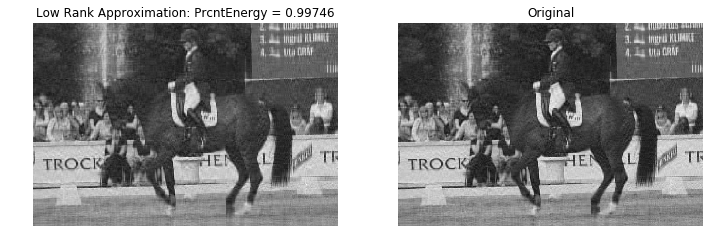

In [13]:
fig,axs = plt.subplots(1,2, figsize = (12,6))

r = 40

Energy = (Σ[:r]**2).sum() / (Σ**2).sum()

A_lowrank = U[:,:r] @ np.diag( Σ[:r] ) @ Vᵀ[:r, :]
axs[0].imshow(A_lowrank)
axs[0].set_title('Low Rank Approximation: PrcntEnergy = %.5f' % Energy)
axs[0].axis('off')
axs[1].imshow(A)
axs[1].set_title('Original')
axs[1].axis('off');

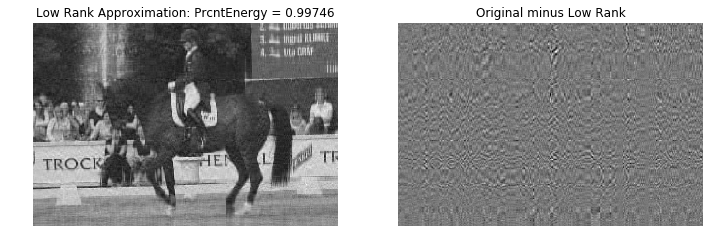

In [14]:
fig,axs = plt.subplots(1,2, figsize = (12,6))

r = 40

Energy = (Σ[:r]**2).sum() / (Σ**2).sum()

A_lowrank = U[:,:r] @ np.diag( Σ[:r] ) @ Vᵀ[:r, :]
axs[0].imshow(A_lowrank)
axs[0].set_title('Low Rank Approximation: PrcntEnergy = %.5f' % Energy)
axs[0].axis('off')
axs[1].imshow(A-A_lowrank)
axs[1].set_title('Original minus Low Rank')
axs[1].axis('off');

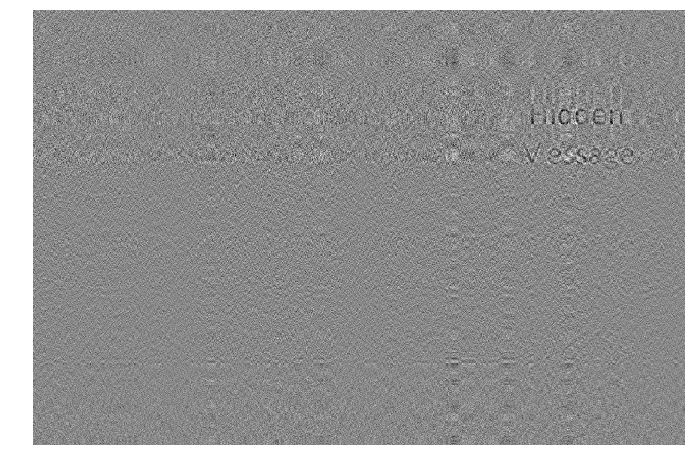

In [15]:
r = 50
m = r + 50 
A_hid = U[:,r:m] @ np.diag( Σ[r:m] ) @ Vᵀ[r:m, :]
plt.figure(figsize = (12,8))
plt.imshow(A_hid)
plt.axis('off');